### James Griffin 
#### cs 501R
#### second lab 

In [4]:
## Importing packages 
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random


In [23]:
# Just like the last homework except adding a few extra variables 
#this is programming the exposed compartment of the model
def seir_model(sim, t, N, beta, gamma, delta):
    ''' function takes into a simulation state, a time, number of people and 
    then parameters for E, beta and gamma as defined in class '''

    S, E, I, R = sim
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I

    return dSdt, dEdt, dIdt, dRdt

In [43]:
#So we will build a function for simulating the model 
def sim_model():
    #number of people suceptable will be random 
    suceptable = np.random.normal(loc = 5000, scale = 1500, size = 5)
    #and we will start with a pre set number of people infected 
    inf = np.random.normal(loc = 100, scale = 30, size = 1)
    #and we start with a recovered population of 0 
    recov = 0 

    #incupation period
    inc_period = [1,3,4,5]
    #modeling the first year 
    days = range(0,365)

    #creating a number of contacts each person comes in contact with while sick
    contacts = np.arange(5,  55, 10)
    #and infection probabilities for each of those interactions 
    inf_prob = random.choice([.001, .05, .1, .5])
    #number of exposed --> this will be a functio  of our inf_prob and our infected 
    #so whatever our infected prob it will be inf/infected_prob  
    exposed = inf/(1-inf_prob)

    #and the recovery rate will be the same 
    recov_rate = [.001, .05, .1, .5]

    for i in range(10):
        S = random.choice(suceptable)
        E = exposed
        I = inf
        R = recov
        N = S+I+R+E
        #print(N)
        beta =  random.choice(contacts)*inf_prob
        gamma = random.choice(recov_rate)
        delta = random.choice(inc_period)
        #print([S,I,R])
        ret = odeint(seir_model, [S,E,I,R], days, args = (N, beta,  gamma, delta))
        S_, E_, I_, R_ = ret.T

        #making plots all nice 
        textstr = 'seir model  simulation'+ "\n"
        textstr += "Susceptable: "+str(S)+'\n'
        textstr += "Infected: "+str(I)+'\n'
        textstr += "Recovered: "+str(R)+'\n'
        textstr += "Pop_number: "+str(N)+'\n'
        textstr += "Gamma: "+str(gamma)+'\n'
        textstr += 'Beta: '+str(beta)+'\n'
        textstr += "Delta: "+str(delta)+'\n'
        textstr += "R0: "+str(beta/gamma)+'\n'

        results = pd.DataFrame( 
            {'Susceptable': S_,
             "Exposed": E_,
             'Infected': I_,
             'Recovered': R_,
             'Days':days
            })
        print(results.head())
        results.plot(x ='Days', y = ['Susceptable', "Exposed", 
                                     "Infected", 'Recovered'], kind = 'area', 
                     stacked = False)
        
        plt.title("SIR Model")
        plt.text(1, 0.1, textstr, fontsize = 12,
                 transform=plt.gcf().transFigure)
        plt.show()

   Susceptable      Exposed     Infected    Recovered  Days
0  7681.144450   165.004374    82.502187     0.000000     0
1   412.156142  1501.624039  5087.180112   927.690717     1
2     0.109811    16.553424  4374.059742  3537.928032     2
3     0.000475     0.114201  2664.109955  5264.426380     3
4     0.000017     0.000792  1615.940799  6312.709402     4


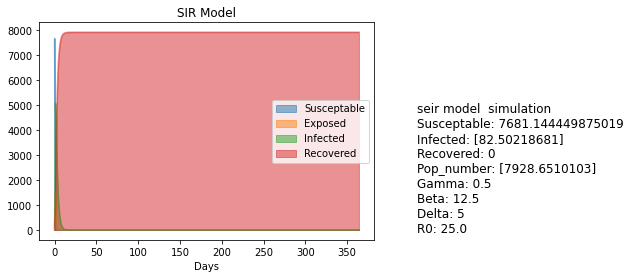

    Susceptable     Exposed     Infected    Recovered  Days
0  4.804747e+03  165.004374    82.502187     0.000000     0
1  3.229266e+00  364.864909  4473.260835   210.898529     1
2  4.788821e-07    2.490318  4384.914388   664.848830     2
3  1.002941e-11    0.016780  3969.916812  1082.319946     3
4 -3.352500e-11    0.000113  3592.144655  1460.108770     4


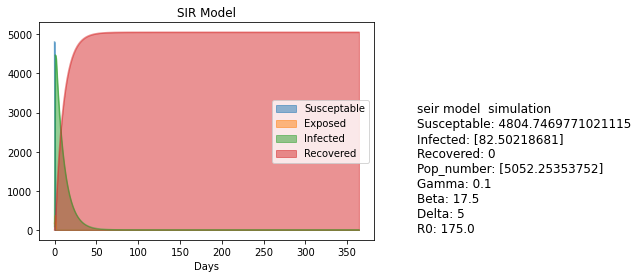

    Susceptable      Exposed     Infected  Recovered  Days
0  4.587076e+03   165.004374    82.502187   0.000000     0
1  2.690429e+02  2880.974231  1683.956287   0.609400     1
2  5.271201e-04  1170.883572  3660.265293   3.433430     2
3  8.667387e-09   430.744202  4396.316166   7.522455     3
4  5.894233e-09   158.461936  4664.045908  12.074979     4


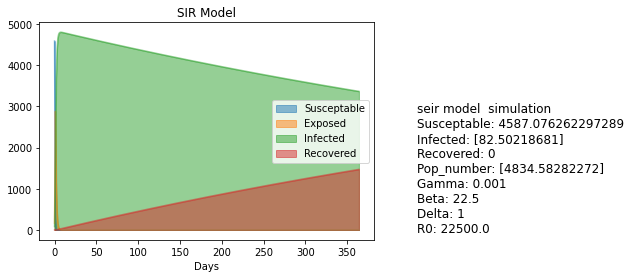

    Susceptable     Exposed     Infected    Recovered  Days
0  4.804747e+03  165.004374    82.502187     0.000000     0
1  4.386132e-01  256.893032  3750.621455  1044.300437     1
2  4.057003e-07    1.735193  2446.369879  2604.148465     2
3  7.439150e-11    0.011692  1484.954733  3567.287113     3
4  3.683686e-13    0.000079   900.678366  4151.575093     4


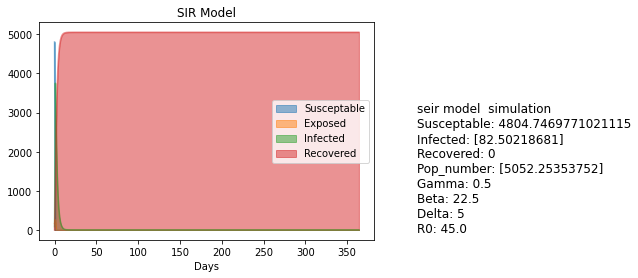

    Susceptable      Exposed     Infected    Recovered  Days
0  7.681144e+03   165.004374    82.502187     0.000000     0
1  9.269052e+02  2726.444319  4208.235495    67.066002     1
2  3.575335e-02   208.175673  7331.059238   389.380346     2
3  3.643978e-07    10.366859  7164.390572   753.893579     3
4 -2.338113e-11     0.516136  6824.482639  1103.652236     4


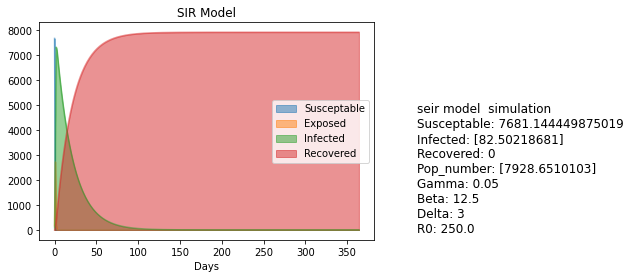

    Susceptable      Exposed     Infected  Recovered  Days
0  5.357549e+03   165.004374    82.502187   0.000000     0
1  1.657577e+02  1208.124572  4229.614486   1.558535     1
2  1.369580e-03    27.032302  5571.215091   6.806561     2
3  5.692797e-09     0.495151  5592.164791  12.395382     3
4 -6.070732e-12     0.009069  5587.061130  17.985125     4


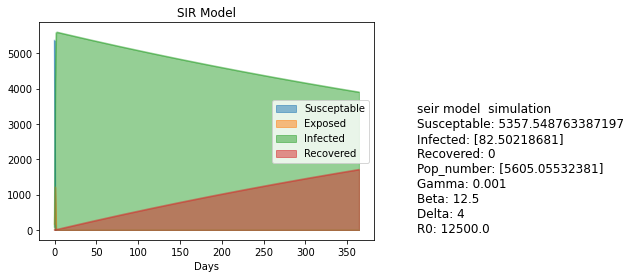

    Susceptable      Exposed     Infected  Recovered  Days
0  5.357549e+03   165.004374    82.502187   0.000000     0
1  2.789019e+00  1085.747079  4514.635785   1.883441     1
2  1.647930e-09    54.221386  5543.694798   7.139140     2
3  3.374487e-11     2.699524  5589.638704  12.717096     3
4  4.040523e-11     0.134401  5586.615138  18.305785     4


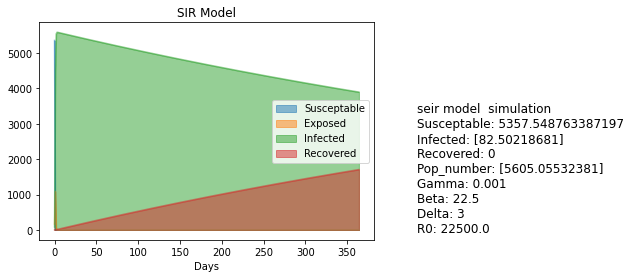

   Susceptable     Exposed     Infected   Recovered  Days
0  5357.548763  165.004374    82.502187    0.000000     0
1  4458.156832  271.002575   855.294969   20.600948     1
2  2005.631282  537.568827  2951.710531  110.144684     2
3   336.220815  211.650317  4746.832985  310.351207     3
4    37.147155   29.252540  4981.359026  557.296603     4


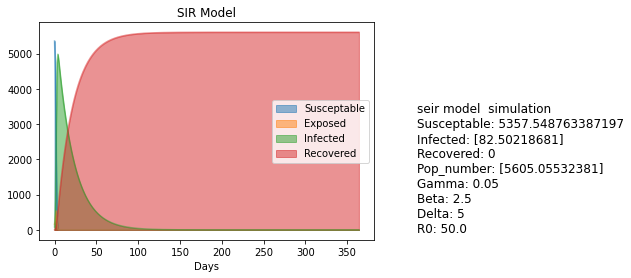

    Susceptable     Exposed     Infected    Recovered  Days
0  4.587076e+03  165.004374    82.502187     0.000000     0
1  1.186126e+00  475.079005  3470.870361   887.447331     1
2  9.074550e-07    8.730322  2425.374615  2400.477885     2
3 -2.510237e-12    0.159901  1476.932988  3357.489934     3
4 -7.893243e-12    0.002929   895.912632  3938.667262     4


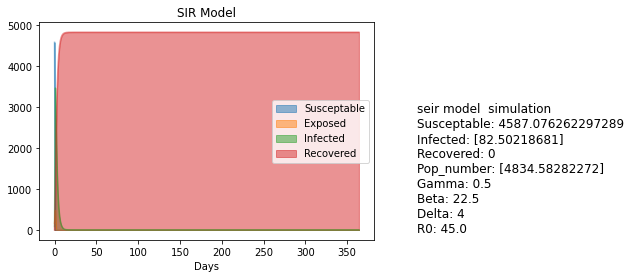

    Susceptable      Exposed     Infected  Recovered  Days
0  4.587076e+03   165.004374    82.502187   0.000000     0
1  2.465666e+02  1461.961458  3124.924079   1.130660     1
2  4.007365e-03    90.883122  4738.300059   5.395634     2
3  1.641781e-08     4.525068  4819.864115  10.193640     3
4  4.525292e-12     0.225290  4819.343347  15.014186     4


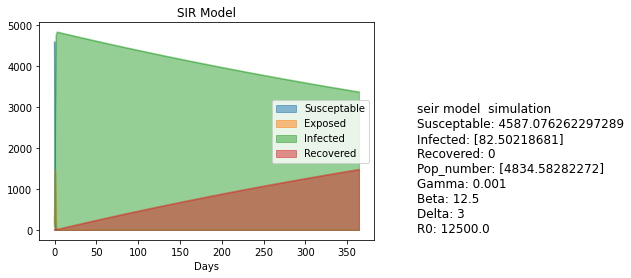

In [44]:
sim_model()

ok so these plots are interesting, again we have plots where the infected population, green mostly includes everybody but the recovery rates are very low. This is partiall due to higher deltas, meaning it takes 3, 4 or 5 days to incubate in someone, but more importantly, the gamma is very small, meanign that our R0, is very high. That is  the reason for the slow recovery.

the mostly pink plots have higher gammas meaning that the recovery rates are really high, which makes sense as to why the number of recovered people is everyone. 

the balanced plots have parameters that are more balanced, nothing really dominates, so each curve has the ability to effect the others. 

In [ ]:
Ok so these plots are pretty interesting, I think the most intersting one 
